In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import kurtosis

In [2]:
data = pd.read_csv('mnist.csv')
Features = data.iloc[1:4000,1:784]
Lables = data.iloc[1:4000,0]
X = np.asarray(Features)
y = np.asarray(Lables)

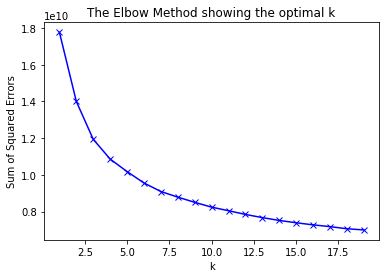

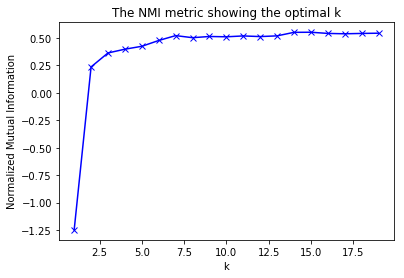

In [15]:
range_n_clusters = list(range(1,20))
sse = []
nmi = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    cluster_labels = clusterer.labels_
    sse.append(clusterer.inertia_)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))
    
plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('k')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing the optimal k')
plt.show()



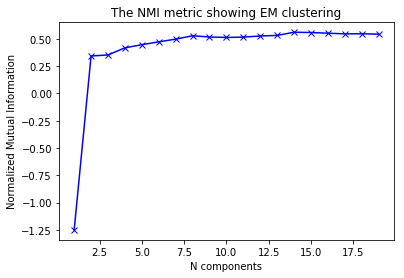

In [17]:
range_n_clusters = list(range(1,20))
nmi = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, random_state=0).fit(X)
    cluster_labels = clusterer.predict(X)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('N components')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing EM clustering')
plt.show()

# Clustering with PCA dimension reduction

In [18]:
pca = PCA(n_components=783)
pca.fit(X)
eigval = pca.explained_variance_ratio_
Accuracy = []
for i in range(1,784):
    pca_curr = PCA(n_components = i)
    X_pca = pca_curr.fit(X).transform(X)
    clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=8)
    FeatTrain4, FeatTest4, LablesTrain4, LablesTest4 = train_test_split(X_pca, Lables, random_state=0, test_size = 0.3)
    clf.fit(FeatTrain4,LablesTrain4)
    test_predict = clf.predict(FeatTest4)
    Accuracy.append(accuracy_score(LablesTest4, test_predict))

Text(0,0.5,'Accuracy')

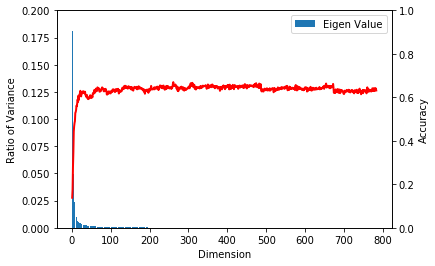

In [40]:
temp = list(range(1,784))
plt.bar(temp,eigval,linewidth = 4,label = "Eigen Value")
plt.ylim(0, 0.2)
plt.xlabel('Dimension')
plt.ylabel('Ratio of Variance')
plt.legend(loc="best")
plt2 = plt.twinx()
plt2.plot(temp,Accuracy,color='red', linewidth=2, markersize=12, label = "Accuracy")
plt2.set_ylim(0, 1)
plt2.set_ylabel('Accuracy')

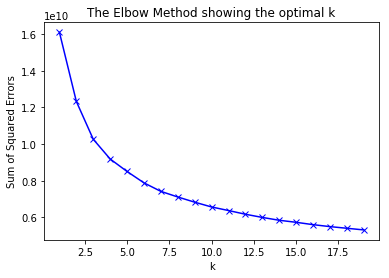

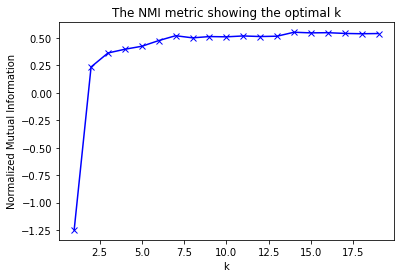

In [41]:
pca = PCA(n_components=86)
X_pca = pca.fit(X).transform(X)
range_n_clusters = list(range(1,20))
sse = []
nmi = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X_pca)
    cluster_labels = clusterer.labels_
    sse.append(clusterer.inertia_)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))
    
plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('k')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing the optimal k')
plt.show()

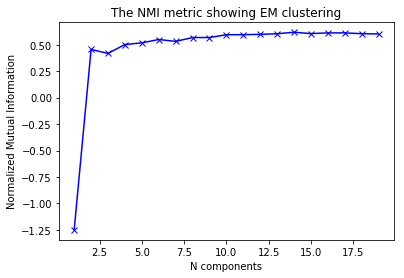

In [25]:
range_n_clusters = list(range(1,20))
nmi = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, random_state=0).fit(X_pca)
    cluster_labels = clusterer.predict(X_pca)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('N components')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing EM clustering')
plt.show()

# Clustering with ICA dimension reduction

/Users/kapil_tahiliani/anaconda2/lib/python2.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


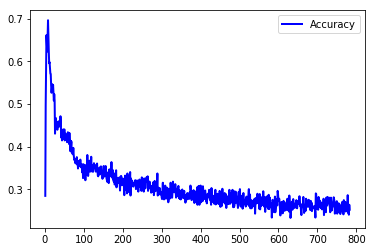

In [26]:
Accuracy = []
for i in range(1,784):
    ica_curr = FastICA(n_components = i)
    X_ica = ica_curr.fit(X).transform(X)
    clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=8)
    FeatTrain4, FeatTest4, LablesTrain4, LablesTest4 = train_test_split(X_ica, Lables, random_state=0, test_size = 0.3)
    clf.fit(FeatTrain4,LablesTrain4)
    test_predict = clf.predict(FeatTest4)
    Accuracy.append(accuracy_score(LablesTest4, test_predict))

temp = list(range(1,784))
plt.plot(temp,Accuracy,color='blue', linewidth=2, markersize=12, label = "Accuracy")
plt.legend(loc="best")

/Users/kapil_tahiliani/anaconda2/lib/python2.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


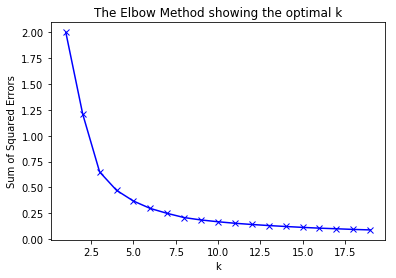

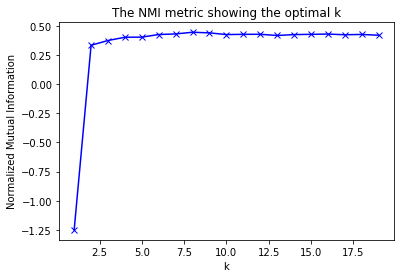

In [3]:
ica = FastICA(n_components=2)
X_ica = ica.fit(X).transform(X)
range_n_clusters = list(range(1,20))
sse = []
nmi = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X_ica)
    cluster_labels = clusterer.labels_
    sse.append(clusterer.inertia_)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))
    
plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('k')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing the optimal k')
plt.show()

[-0.88687557 -1.34986084]


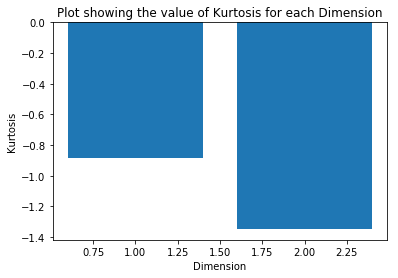

In [6]:
temp1 = list(range(1,3))
p = kurtosis(X_ica)
plt.bar(temp1,p)
plt.xlabel('Dimension')
plt.ylabel('Kurtosis')
plt.title('Plot showing the value of Kurtosis for each Dimension')
print(p)

In [ ]:
temp1 = list(range(1,3))
p = kurtosis(X_ica)
plt.bar(temp1,p)
plt.xlabel('Dimension')
plt.ylabel('Kurtosis')
plt.title('Plot showing the value of Kurtosis for each Dimension')
print(p)

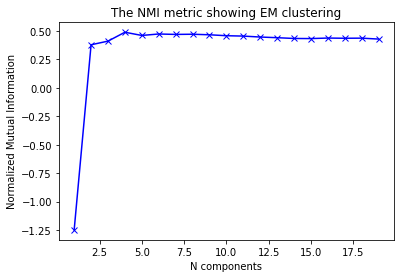

In [28]:
range_n_clusters = list(range(1,20))
nmi = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, random_state=0).fit(X_ica)
    cluster_labels = clusterer.predict(X_ica)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('N components')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing EM clustering')
plt.show()

# Random Projection

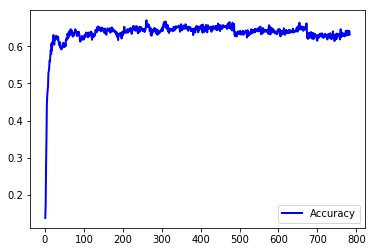

In [29]:
Accuracy = []
for i in range(1,784):
    rp_curr = GaussianRandomProjection(n_components=i, random_state=10)
    X_rp = rp_curr.fit(X).transform(X)
    clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=10)
    FeatTrain4, FeatTest4, LablesTrain4, LablesTest4 = train_test_split(X_rp, Lables, random_state=0, test_size = 0.3)
    clf.fit(FeatTrain4,LablesTrain4)
    test_predict = clf.predict(FeatTest4)
    Accuracy.append(accuracy_score(LablesTest4, test_predict))

temp = list(range(1,784))
plt.plot(temp,Accuracy,color='blue', linewidth=2, markersize=12, label = "Accuracy")
plt.legend(loc="best")

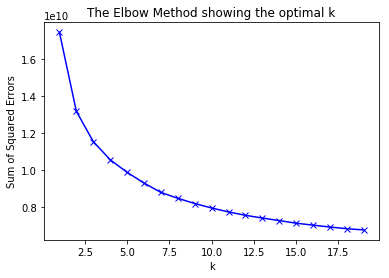

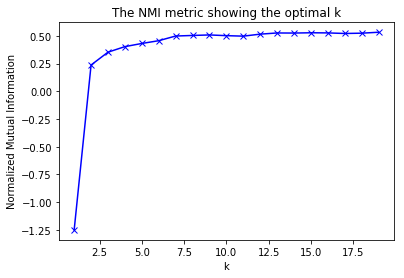

In [7]:
rp = GaussianRandomProjection(n_components=94, random_state=10)
X_rp = rp.fit(X).transform(X)
range_n_clusters = list(range(1,20))
sse = []
nmi = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X_rp)
    cluster_labels = clusterer.labels_
    sse.append(clusterer.inertia_)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))
    
plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('k')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing the optimal k')
plt.show()

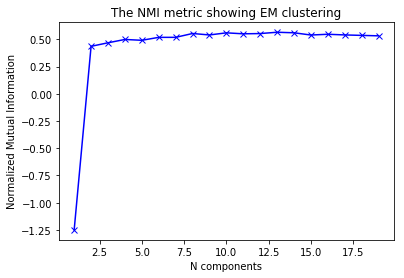

In [8]:
range_n_clusters = list(range(1,20))
nmi = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, random_state=0).fit(X_rp)
    cluster_labels = clusterer.predict(X_rp)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('N components')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing EM clustering')
plt.show()

# Selection Algorithm

In [10]:
kbest_curr = SelectKBest(mutual_info_classif, k='all')
kbest_curr.fit(X,y)
score = kbest_curr.scores_



<BarContainer object of 783 artists>

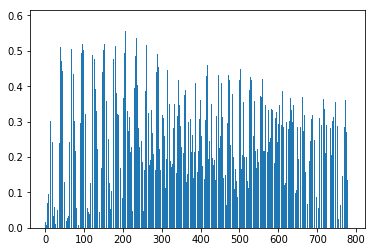

In [12]:
temp = list(range(1,784))
plt.bar(temp,score)

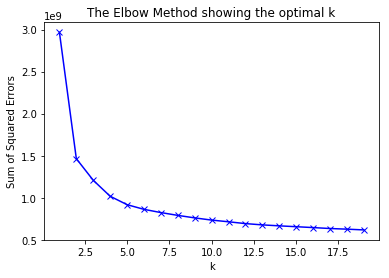

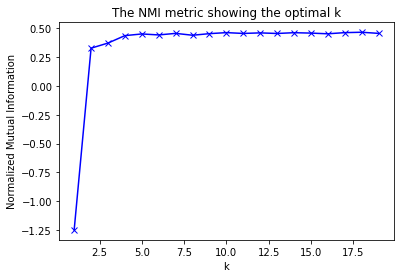

In [13]:
X_s = SelectKBest(mutual_info_classif, k=86).fit_transform(X, y)
sse = []
nmi = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X_s)
    cluster_labels = clusterer.labels_
    sse.append(clusterer.inertia_)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))
    
plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('k')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing the optimal k')
plt.show()



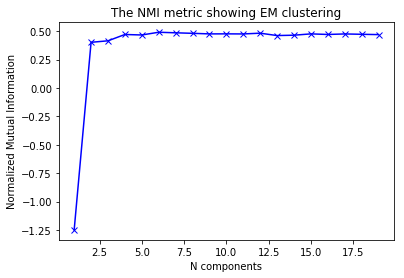

In [14]:
range_n_clusters = list(range(1,20))
nmi = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, random_state=0).fit(X_s)
    cluster_labels = clusterer.predict(X_s)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('N components')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing EM clustering')
plt.show()